In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [144]:
# gas phase
#path = r"C:\Users\Mike.DESKTOP-CA70LTI\Google Drive\PhD\BXD\applications\EVB_HF\rxnSystemOnly\jacobian\20_friction\analysis\FPT_arrays"
# solvent phase
path = r"C:\Users\Mike.DESKTOP-CA70LTI\Google Drive\PhD\BXD\applications\EVB_HF\solvent\jacobian_invert\bxd_runs" \
       r"\box_runs\trajectories\analysis_final\FPT_arrays"

In [230]:
allBoxes = pd.DataFrame() #creates a new dataframe that's empty
mfpts_fwd = []
mfpts_bwd = [] 
std_fwd = [] 
std_bwd = []
import glob 
import ntpath
files = glob.glob(path+"\\" + "*.txt")
# total hack to work out 
max_box = max([int(ntpath.basename(f).split(".")[0].split("to")[1]) for f in files]) -1
print('Number of boxes', max_box)
for box in range(0, max_box):
    box_forward = "{}to{}".format(box, box + 1)
    box_back = "{}to{}".format(box+1, box)
    fwd_fpts = pd.read_csv(path + "\\" + box_forward + ".txt", header=None,
                           names=['FPT']).assign(Direction="Forward", Box=box)
    bkd_fpts = pd.read_csv(path + "\\" + box_back + ".txt", header=None,
                           names=['FPT']).assign(Direction="Backward", Box=box)
    # multiply by 0.1 for fs, then 0.001 for ps
    fwd_fpts['FPT'] = fwd_fpts['FPT'].apply(lambda x: x * 0.1 * 0.001)   
    bkd_fpts['FPT'] = bkd_fpts['FPT'].apply(lambda x: x * 0.1 * 0.001) 
 
    mfpts_fwd.append(np.mean(fwd_fpts["FPT"]))
    mfpts_bwd.append(np.mean(bkd_fpts["FPT"]))
    
    std_fwd.append(np.std(fwd_fpts["FPT"]) / math.sqrt(float(len(fwd_fpts))))
    std_bwd.append(np.std(bkd_fpts["FPT"]) / math.sqrt(float(len(bkd_fpts))))
    
    # standard error
    #if(box == 7): 
    #    print(bkd_fpts)
    #print("num fpts forward for box {}: {}".format(box,len(fwd_fpts)))
    #print("std forward for box {}: {}".format(box,np.std(fwd_fpts["FPT"])))
    #print("std error forward for box {}: {}".format(box,std_fwd[-1]))
    #print("num fpts backward for box {}: {}".format(box,len(bkd_fpts)))
    #print("std backward for box {}: {}".format(box,np.std(bkd_fpts["FPT"])))
    #print("std error backward for box {}: {}".format(box,std_bwd[-1]))


    # standard deviation
    #std_fwd.append(np.std(fwd_fpts["FPT"]))
    #std_bwd.append(np.std(bkd_fpts["FPT"]))
    
    allBoxes = pd.concat([allBoxes, fwd_fpts, bkd_fpts])

Number of boxes 12
num fpts forward for box 0: 585
std forward for box 0: 3.2657519127966568
std error forward for box 0: 0.1350222239126444
num fpts backward for box 0: 26995
std backward for box 0: 0.07188215511891936
std error backward for box 0: 0.00043750137615915165
num fpts forward for box 1: 21030
std forward for box 1: 0.18891090606226874
std error forward for box 1: 0.001302678947693567
num fpts backward for box 1: 835
std backward for box 1: 3.587249577624485
std error backward for box 1: 0.12414189067578815


num fpts forward for box 2: 268327
std forward for box 2: 0.0010404579471203395
std error forward for box 2: 2.0085948469927652e-06
num fpts backward for box 2: 2218
std backward for box 2: 0.6673049293606893
std error backward for box 2: 0.014169142305201369
num fpts forward for box 3: 128168
std forward for box 3: 0.0008637933366656626
std error forward for box 3: 2.412792897991342e-06
num fpts backward for box 3: 1429
std backward for box 3: 1.7130298260635803
std error backward for box 3: 0.04531571223489472


num fpts forward for box 4: 270043
std forward for box 4: 0.0018865394435851935
std error forward for box 4: 3.6303577794327066e-06
num fpts backward for box 4: 1813
std backward for box 4: 0.6676185254255039
std error backward for box 4: 0.015679401355178396
num fpts forward for box 5: 152363
std forward for box 5: 0.002864293611378308
std error forward for box 5: 7.338001170624977e-06
num fpts backward for box 5: 1409
std backward for box 5: 0.46139124015760097
std error backward for box 5: 0.012291753670637203


num fpts forward for box 6: 63796
std forward for box 6: 0.0038958584714704554
std error forward for box 6: 1.5424334918651775e-05
num fpts backward for box 6: 308
std backward for box 6: 5.518125758641743
std error backward for box 6: 0.314424396215795
         FPT  Box Direction
0     0.0192    7  Backward
1    41.5441    7  Backward
2     0.0262    7  Backward
3     0.0280    7  Backward
4    62.3335    7  Backward
5     0.0246    7  Backward
6     0.0285    7  Backward
7    15.4755    7  Backward
8     6.5918    7  Backward
9    62.0477    7  Backward
10    0.0225    7  Backward
11   34.7358    7  Backward
12    3.8825    7  Backward
13    4.0181    7  Backward
14    0.8709    7  Backward
15    0.1405    7  Backward
16   30.0920    7  Backward
17   13.0201    7  Backward
18    0.0243    7  Backward
19    0.0298    7  Backward
20   29.5904    7  Backward
21   34.9052    7  Backward
22   23.0616    7  Backward
23   46.2346    7  Backward
24   29.4086    7  Backward
25    2.9246    7 

num fpts forward for box 8: 99585
std forward for box 8: 0.007463370851847077
std error forward for box 8: 2.3650376466264533e-05
num fpts backward for box 8: 1409
std backward for box 8: 0.8672643335294778
std error backward for box 8: 0.023104468891590572
num fpts forward for box 9: 46206
std forward for box 9: 0.012164098655581617
std error forward for box 9: 5.6588834183414945e-05
num fpts backward for box 9: 756
std backward for box 9: 2.433939767721799
std error backward for box 9: 0.08852153351228872
num fpts forward for box 10: 16323
std forward for box 10: 0.12984577871170527
std error forward for box 10: 0.0010163138521444644
num fpts backward for box 10: 4042
std backward for box 10: 1.3520393602002831
std error backward for box 10: 0.02126626298852197


num fpts forward for box 11: 2201
std forward for box 11: 1.0168213817503835
std error forward for box 11: 0.021673779400163275
num fpts backward for box 11: 5397
std backward for box 11: 0.37213598497168326
std error backward for box 11: 0.00506553661181309


In [204]:
mdf = pd.melt(allBoxes, id_vars=['Box', 'Direction'], value_vars=['FPT'], value_name='FPT (ps)')
mdf.head()

,Box,Direction,variable,FPT (ps)
0,0,Forward,FPT,0.0094
1,0,Forward,FPT,0.3800
2,0,Forward,FPT,0.4950
3,0,Forward,FPT,0.0172
4,0,Forward,FPT,0.0053


In [217]:
print('Forward', mfpts_fwd)
print('Forward std err', std_fwd)
print('Backward', mfpts_bwd)
print('Backwrad std error', std_bwd)

Forward [1.8950909401709424, 0.03872077032810209, 0.005312103888167251, 0.0047073403657696645, 0.004759091329900095, 0.005393000925421203, 0.006575473383911087, 0.00891061611048005, 0.012962356780639875, 0.019434017227199896, 0.07914975188384486, 0.40775888232621527]
Forward std err [0.1350222239126444, 0.001302678947693567, 2.0085948469927652e-06, 2.412792897991342e-06, 3.6303577794327066e-06, 7.338001170624977e-06, 1.5424334918651775e-05, 1.4531352263640187e-05, 2.3650376466264533e-05, 5.6588834183414945e-05, 0.0010163138521444644, 0.021673779400163275]
Backward [0.03018641970735296, 1.686969820359279, 0.27189504057709624, 0.895215395381387, 0.45229139547711, 0.2964973740241298, 4.171129545454549, 21.960947169811327, 0.6352661462029817, 1.7002625661375668, 0.19804562097971312, 0.13885523438947558]
Backwrad std error [0.00043750137615915165, 0.12414189067578815, 0.014169142305201369, 0.04531571223489472, 0.015679401355178396, 0.012291753670637203, 0.314424396215795, 3.6061595069658727

In [212]:
import math
# formula i calculated. 
#box_rates_var = [math.pow(m_b / s_b, 2) + (m_b * m_b * s_f * s_f / math.pow(m_f, 4)) for m_f, s_f, m_b, s_b in zip(mfpts_fwd, std_fwd, mfpts_bwd, std_bwd)]
# formula from web.
box_rates_var = [math.pow(m_b / m_f, 2)*(math.pow(s_f/ m_f, 2) + math.pow(s_b / m_b, 2)) for m_f, s_f, m_b, s_b in zip(mfpts_fwd, std_fwd, mfpts_bwd, std_bwd)]

box_rates_var

[1.3412895105426943e-06,
 12.427341194014767,
 7.115032164748264,
 92.68104960563673,
 10.85978211981332,
 5.200370552448721,
 2288.7521737959414,
 163801.25687723068,
 3.1850455216445837,
 20.812730250956523,
 0.07322328837722987,
 0.0004819550658299701]

In [213]:
box_rates_std = [math.sqrt(x) for x in box_rates_var]

In [214]:
box_rate = [ m_b / m_f for m_f, m_b in zip(mfpts_fwd, mfpts_bwd)]
inv_rates = [ 1 / rate for rate in box_rate]
print(box_rate)

[0.015928744667329825, 43.56756867347082, 51.18405932962726, 190.17435023205857, 95.03734308175268, 54.97817970446071, 634.3466548979571, 2464.5823473398636, 49.00853733263947, 87.4889914040971, 2.502163509878746, 0.34053270304578825]


In [1]:
rates = pd.DataFrame({'Box': range(len(box_rate)), 'Rate': box_rate, 'Inverse Rate': inv_rates, 'Error': box_rates_std })
from matplotlib.colors import ListedColormap
palette = sns.color_palette()
fig, ax = plt.subplots()
barlist = ax.bar([x + 1 for x in range(len(box_rate))],box_rate, yerr=box_rates_std)
for bar, color in zip(barlist, palette):
    bar.set_color(color)
ax.set_yscale('log')
plt.show()

NameError: name 'pd' is not defined

## Calculate error on box free energies

In [180]:
box_free_energy_var = [math.pow(1 / m_f, 2)*math.pow(s_f, 2) + math.pow(1 / m_b, 2)*math.pow(s_b, 2) for m_f, s_f, m_b, s_b in zip(mfpts_fwd, std_fwd, mfpts_bwd, std_bwd)]
print(box_free_energy_var)

# compute standard error of each box free energy difference
box_energy_std = [math.sqrt(v) for v in box_free_energy_var]
# compute cumulative box_free_energy std deviation.
# via sqrt of summation of previous square of error for each box
box_energy_std_cuml = np.array([math.sqrt(v) for v in np.cumsum(box_free_energy_var)])
box_energy_std_cuml =  np.insert(box_energy_std_cuml, 0, 0)
# convert to kcal/mol.
box_energy_std_cuml = 0.5961612401 * box_energy_std_cuml
print(box_energy_std_cuml)

[0.0052863927633650075, 0.006547139179056081, 0.0027158602295772353, 0.002562636817273138, 0.0012023545168697394, 0.0017204956439186318, 0.005687814993121556, 0.02696687132323588, 0.0013260874396219828, 0.0027190815665263, 0.011695474761189128, 0.004156127843439732]
[0.         0.04334544 0.06485164 0.07190948 0.07798561 0.08067889
 0.08438342 0.0956141  0.13684409 0.13855543 0.14199997 0.15595082
 0.16061688]


In [2]:
box_free_energy_diff = [-1.0 * math.log(Keq) for Keq in box_rate]
print('free energy diffs:', box_free_energy_diff)
box_free_energy = np.cumsum(box_free_energy_diff)
box_free_energy = np.insert(box_free_energy, 0, 0)
# conver to kcal / mol
box_free_energy = 0.5961612401 * box_free_energy
print(box_free_energy)

NameError: name 'box_rate' is not defined

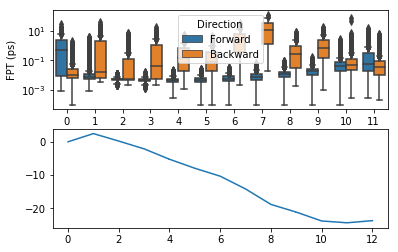

In [195]:
f, (ax1, ax2) = plt.subplots(2)
ax = sns.boxplot(x = "Box", y="FPT (ps)",  hue="Direction", data=mdf, ax=ax1)
ax.set_yscale('log')
ax2.errorbar([x for x in range(len(box_rate)+1)], box_free_energy, yerr=box_energy_std_cuml)
plt.show()